In [1]:
from PIL import Image
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import os

import torch

# dataset_root = "W:/DataSets/SIRST"

In [2]:
pict = np.array(Image.open('W:/DataSets/SIRST/masks/Misc_10_pixels0.png').convert('L'))
pict = np.array((pict, np.array(Image.open('W:/DataSets/SIRST/images/Misc_10.png').convert('L'))))
pict = torch.from_numpy(pict).type(torch.float32)/255
pict = pict.type(torch.float32)/255
pict = pict.unsqueeze(0).view(2, 1, 240, 320)
pict = pict[:,:,:,:240]
print(pict.shape)

torch.Size([2, 1, 240, 240])


In [3]:
from net.basenet import GaussianConv2d

In [4]:
net = GaussianConv2d(3)

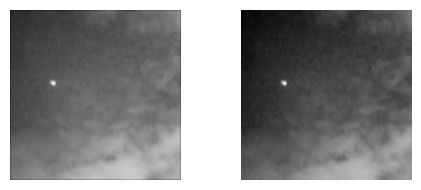

In [5]:
res = net(pict)

originp = np.array(pict)
gaussp = np.array(res)

fig, axes = plt.subplots(1, 2, figsize=(5, 2))
# plt.imshow(gaussp[0,0], cmap='gray')
axes[0].imshow(gaussp[1,0], cmap='gray')
axes[0].axis('off')  # 关闭坐标轴显示
    
axes[1].imshow(originp[1,0], cmap='gray')
axes[1].axis('off')  # 同样关闭坐标轴显示
# plt.title('Blurred Image')
plt.tight_layout()
plt.show()

In [6]:
from utils.loss import ImageRecoverLoss

loss_f = ImageRecoverLoss([0.2,0.2,0.3,0.3])

In [8]:
print(res.shape)
res[1], res[0] = res[0], res[1]

torch.Size([2, 1, 240, 240])


In [9]:
loss = loss_f(res, pict)
print(loss)

tensor(0.0011)


In [49]:
b = img.unsqueeze(0)
print(b.shape)

NameError: name 'img' is not defined

In [2]:
from dataprocess.sirst import NUDTDataset, IRSTD1kDataset
import torch.utils.data as Data
import numpy as np

In [3]:
trainset = IRSTD1kDataset(base_dir=r'W:/DataSets/ISTD/IRSTD-1k', mode='train', mask_blurred=False, base_size=256)
train_data_loader = Data.DataLoader(trainset, batch_size=8, shuffle=False)

In [4]:
data_ = []
label_ = []
for i, (data, label) in enumerate(train_data_loader):
    data_.append(np.array(data))
    label_.append(np.array(label))
    if i>0:
        break
data = data_[0]
label = label_[0]

In [5]:
print(label.shape)

# 沿着轴0（垂直轴）找到每列的最大值索引
max_index_axis_0 = np.argmax(label[1,0], axis=0)
print("Max indices along axis 0:", max_index_axis_0)

# 沿着轴1（水平轴）找到每行的最大值索引
max_index_axis_1 = np.argmax(label[1,0], axis=1)
print("Max indices along axis 1:", max_index_axis_1)

(8, 1, 256, 256)
Max indices along axis 0: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 156 156 155   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 141 141   0 121
 121 122 122 121 121   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0

In [6]:
print(label[1,0,50:60,200:210])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


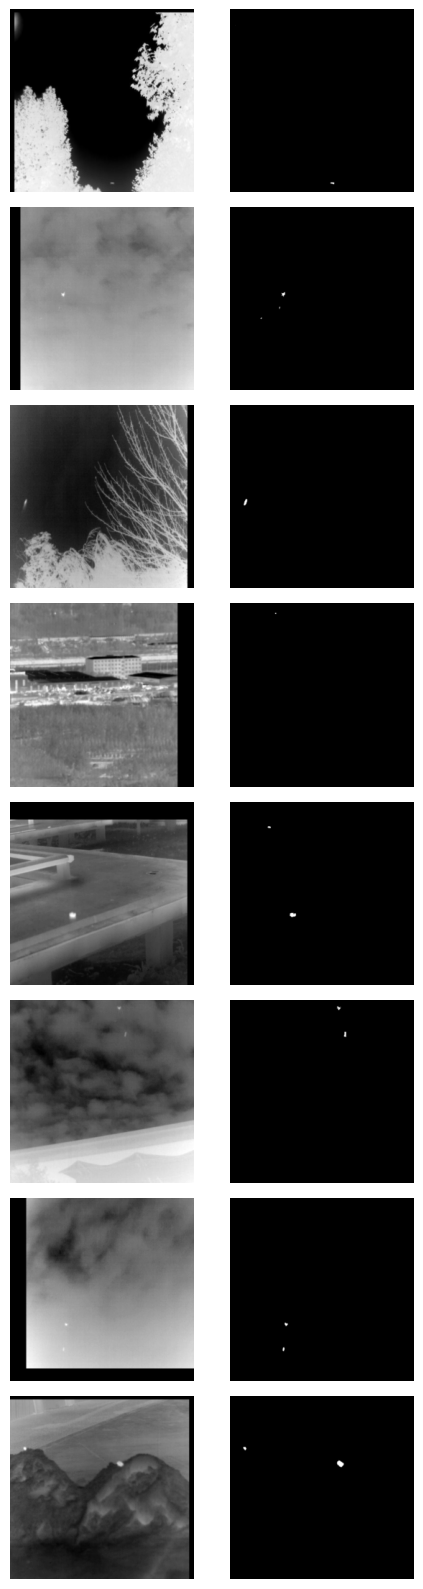

In [7]:
n = data.shape[0]  # 图片对的数量
shape = data.shape[-2:]

# 创建一个n行2列的子图网格
fig, axes = plt.subplots(n, 2, figsize=(5, 2*n))  # 调整figsize以适应你的需要

for i in range(n):
    
    # 在当前行的第一列显示第一张图片
    axes[i, 0].imshow(data[i].reshape(*shape), cmap='gray')
    axes[i, 0].axis('off')  # 关闭坐标轴显示
    
    # 在当前行的第二列显示第二张图片
    axes[i, 1].imshow(label[i].reshape(*shape), cmap='gray')
    axes[i, 1].axis('off')  # 同样关闭坐标轴显示

# 显示图表
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

In [8]:
label[0, 45:60, 50:80]

array([], shape=(0, 30, 256), dtype=float32)

In [5]:
a = (1*16 + 16*16*5 + 16*32 + 32*32 + 32*32 + 32*32 + 64*32 + 64*64 + 16*16+(16+32)*(16+32)+(32+32+16)*(32+32+16)+(64+32+32+16)*(64+32+16+32))*9 + 16*16+(16+32)*(16+32)+(32+32+16)*(32+32+16)+(64+32+16+32)*(64+32+16+32)
print(a)

396176


In [14]:
a = [1,2,3,4]
b = sum(a[-2:])
print(b)

7


In [30]:
import onnx

# 加载模型
model_path = "referenceNetwork\yolov8n-seg.onnx"
model = onnx.load(model_path)

# 为了获取节点的输出信息，我们需要遍历graph的节点和值信息（ValueInfoProto）
for node in model.graph.node:
    # 遍历每个节点的输出名
    for output_name in node.output:
        # 查找与输出名对应的ValueInfoProto对象以获取shape信息
        value_info = next((vi for vi in model.graph.value_info + model.graph.output if vi.name == output_name), None)
        if value_info is not None:
            # 打印节点名称和对应的输出shape
            shape_str = ', '.join(str(dim.dim_value) for dim in value_info.type.tensor_type.shape.dim)
            print(f"Node: {node.name if node.name else 'Unnamed Node'}, Output: {output_name}, Shape: {shape_str}")
        else:
            # 如果在value_info和output中都找不到对应的输出名，可能是因为该模型没有提供详细的输出信息
            print(f"Node: {node.name if node.name else 'Unnamed Node'}, Output: {output_name}, Shape information not available in model metadata.")

TypeError: unsupported operand type(s) for +: 'google.protobuf.pyext._message.RepeatedCompositeContainer' and 'google.protobuf.pyext._message.RepeatedCompositeContainer'

In [1]:
import os.path as osp
import yaml

cfg = {'c': 32}

In [4]:
file_path = osp.join('result/test', 'cfg.yaml')

with open(file_path, 'w', encoding='utf-8') as file:
            yaml.dump(cfg, file, allow_unicode=True)

In [1]:
from net.basenet import BaseNet2, LargeBaseNet2, ResBlock, BaseNet1, BaseNet3, GaussNet, GaussNet3
import yaml
import torch.nn as nn
import torch

cfg_path = 'cfg.yaml'
with open(cfg_path) as f:
    cfg = yaml.safe_load(f)
print(cfg)

{'resconv_outchannel': 16, 'multiscalefeature_outchannel': [32, 64, 128], 'gauss_sigma': 0.6, 'gauss_tempreture': 2.5, 'featurefusion_outchannel': 32, 'noise_filter_threshold': 0.1, 'background_aug_threshold': 0.5, 'multiscale_recov_loss_weight': [1]}


In [51]:
b = torch.rand((2, 4, 3, 3))
print(b)
a = torch.tensor([2.5]).repeat(1, 4, 1, 1)
c = b*a
d = b+a
print(d)

tensor([[[[0.1468, 0.2373, 0.8697],
          [0.7173, 0.9630, 0.8461],
          [0.1295, 0.6237, 0.1340]],

         [[0.2061, 0.8801, 0.8274],
          [0.1970, 0.8872, 0.9607],
          [0.4490, 0.1921, 0.8926]],

         [[0.8246, 0.2911, 0.1708],
          [0.1509, 0.6879, 0.3413],
          [0.1622, 0.6623, 0.7419]],

         [[0.9912, 0.7256, 0.5426],
          [0.8498, 0.8746, 0.3994],
          [0.4281, 0.5471, 0.2749]]],


        [[[0.7719, 0.2843, 0.5745],
          [0.6607, 0.8474, 0.6171],
          [0.0329, 0.2935, 0.6628]],

         [[0.3440, 0.1736, 0.8685],
          [0.3741, 0.2388, 0.8986],
          [0.1153, 0.1683, 0.5971]],

         [[0.2991, 0.5296, 0.8186],
          [0.2102, 0.9068, 0.6353],
          [0.9289, 0.3934, 0.3626]],

         [[0.7346, 0.1513, 0.3925],
          [0.8394, 0.6131, 0.2684],
          [0.6506, 0.0037, 0.4379]]]])
tensor([[[[2.6468, 2.7373, 3.3697],
          [3.2173, 3.4630, 3.3461],
          [2.6295, 3.1237, 2.6340]],

       

In [24]:
dict = torch.load("result/20240806T08-46-39_guass6_2_irstd1k/best.pkl")

In [25]:
for key in dict:
    print(key)

resconv.block1.conv2d1.weight
resconv.block1.conv2d1.bias
resconv.block1.conv2d2.weight
resconv.block1.conv2d2.bias
resconv.block1.bn1.weight
resconv.block1.bn1.bias
resconv.block1.bn1.running_mean
resconv.block1.bn1.running_var
resconv.block1.bn1.num_batches_tracked
resconv.block1.bn2.weight
resconv.block1.bn2.bias
resconv.block1.bn2.running_mean
resconv.block1.bn2.running_var
resconv.block1.bn2.num_batches_tracked
resconv.block2.conv2d1.weight
resconv.block2.conv2d1.bias
resconv.block2.conv2d2.weight
resconv.block2.conv2d2.bias
resconv.block2.bn1.weight
resconv.block2.bn1.bias
resconv.block2.bn1.running_mean
resconv.block2.bn1.running_var
resconv.block2.bn1.num_batches_tracked
resconv.block2.bn2.weight
resconv.block2.bn2.bias
resconv.block2.bn2.running_mean
resconv.block2.bn2.running_var
resconv.block2.bn2.num_batches_tracked
resconv.block3.conv2d1.weight
resconv.block3.conv2d1.bias
resconv.block3.conv2d2.weight
resconv.block3.conv2d2.bias
resconv.block3.bn1.weight
resconv.block3.bn1

In [33]:
print(dict["multiscalef.pyramid.1.gauss.tempreture"])

tensor(2.6547, device='cuda:0')


In [21]:
func = nn.Sigmoid()
a = func(2.5*torch.tensor(0.6)+0.2)
b = func(2.5*torch.tensor(0.6))
print(a, b)

tensor(0.8455) tensor(0.8176)


In [4]:
res = model(input_data)

torch.Size([2, 16, 128, 128])


In [5]:
print(res[0].shape, res[1].shape)

torch.Size([2, 1, 256, 256]) torch.Size([2, 1, 256, 256])


In [1]:
from net.basenet import GaussianConv2d

In [2]:
gauss = GaussianConv2d(3, 0.6)
print(gauss.conv.weight.data)

tensor([[[[-0.0277, -0.1110, -0.0277],
          [-0.1110,  0.4452, -0.1110],
          [-0.0277, -0.1110, -0.0277]]]])


In [9]:
print(pict.shape)

torch.Size([1, 2, 240, 320])


In [10]:
gauss_pict = gauss(pict)

torch.Size([1, 2, 240, 320])


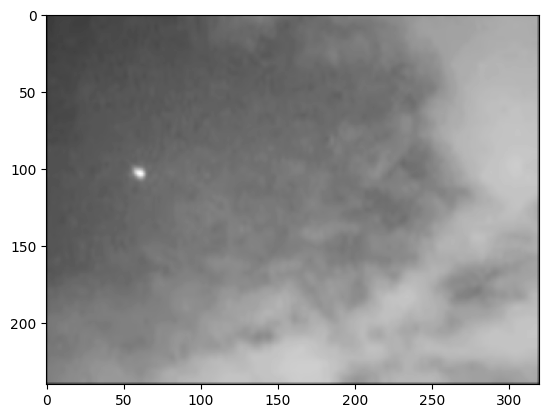

In [13]:
print(gauss_pict.shape)
gaussp = np.array(gauss_pict)
plt.imshow(gaussp[0,1], cmap='gray')
# plt.title('Blurred Image')
plt.show()

In [ ]:
class Upsampler_rep(nn.Module):

    def __init__(self, in_channels, out_channels, upscale_factor=4):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels * (upscale_factor**2), 1)
        self.conv3 = nn.Conv2d(in_channels, out_channels * (upscale_factor**2), 3, 1, 1)
        self.conv1x1 = nn.Conv2d(in_channels, in_channels * 2, 1)
        self.conv3x3 = nn.Conv2d(in_channels * 2, out_channels * (upscale_factor**2), 3)
        self.pixel_shuffle = nn.PixelShuffle(upscale_factor)

    def forward(self, x):
        v1 = F.conv2d(x, self.conv1x1.weight, self.conv1x1.bias, padding=0)
        v1 = F.pad(v1, (1, 1, 1, 1), 'constant', 0)
        b0_pad = self.conv1x1.bias.view(1, -1, 1, 1)
        v1[:, :, 0:1, :] = b0_pad
        v1[:, :, -1:, :] = b0_pad
        v1[:, :, :, 0:1] = b0_pad
        v1[:, :, :, -1:] = b0_pad
        v2 = F.conv2d(v1, self.conv3x3.weight, self.conv3x3.bias, padding=0)
        out = self.conv1(x) + self.conv3(x) + v2
        return self.pixel_shuffle(out)